<a href="https://colab.research.google.com/github/kiru-44/Elevate-Labs-Internship/blob/main/student_mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv("dataset.csv")
print(df.head())

  Student_ID  Age Gender  Hours_Studied  Sleep_Hours Stress_Level  Exam_Score  \
0       S001   24   Male            3.5          6.5         High        69.9   
1       S002   21  Other            0.4          6.3       Medium        46.4   
2       S003   22  Other            3.5          5.1          Low        92.2   
3       S004   24   Male            2.4          6.1         High        76.0   
4       S005   20   Male            2.0          6.2          Low        43.3   

  Part_of_Clubs Therapy_Seeking  Depression_Score  
0            No              No               4.7  
1           Yes              No               5.9  
2            No             Yes               5.2  
3            No             Yes               6.1  
4            No              No               1.9  


In [138]:
print("Shape:", df.shape)

Shape: (50, 10)


In [139]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student_ID        50 non-null     object 
 1   Age               50 non-null     int64  
 2   Gender            47 non-null     object 
 3   Hours_Studied     47 non-null     float64
 4   Sleep_Hours       47 non-null     float64
 5   Stress_Level      50 non-null     object 
 6   Exam_Score        50 non-null     float64
 7   Part_of_Clubs     50 non-null     object 
 8   Therapy_Seeking   50 non-null     object 
 9   Depression_Score  50 non-null     float64
dtypes: float64(4), int64(1), object(5)
memory usage: 4.0+ KB
None


In [140]:
print(df.describe())

             Age  Hours_Studied  Sleep_Hours  Exam_Score  Depression_Score
count  50.000000      47.000000    47.000000   50.000000         50.000000
mean   21.280000       2.919149     6.382979   66.758000          3.994000
std     1.852081       1.336712     0.962632   15.725023          2.114904
min    18.000000      -0.900000     4.600000   41.800000          0.000000
25%    20.000000       2.200000     5.600000   54.900000          2.225000
50%    21.000000       3.100000     6.500000   67.050000          4.400000
75%    23.000000       3.650000     6.850000   76.225000          5.575000
max    24.000000       5.300000     8.700000  101.800000          7.700000


In [141]:
print(df.isnull().sum())

Student_ID          0
Age                 0
Gender              3
Hours_Studied       3
Sleep_Hours         3
Stress_Level        0
Exam_Score          0
Part_of_Clubs       0
Therapy_Seeking     0
Depression_Score    0
dtype: int64


In [142]:
df['Hours_Studied'] = df['Hours_Studied'].fillna(df['Hours_Studied'].mean())

In [143]:
df['Sleep_Hours'] = df['Sleep_Hours'].fillna(df['Sleep_Hours'].median())

In [144]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [145]:
df['Part_of_Clubs'] = df['Part_of_Clubs'].map({'Yes': 1, 'No': 0})

In [146]:
df['Therapy_Seeking'] = df['Therapy_Seeking'].map({'Yes': 1, 'No': 0})

In [147]:
df = pd.get_dummies(df, columns=['Gender', 'Stress_Level'], drop_first=True)

In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'Hours_Studied', 'Sleep_Hours', 'Exam_Score', 'Depression_Score']
df[num_cols] = scaler.fit_transform(df[num_cols])


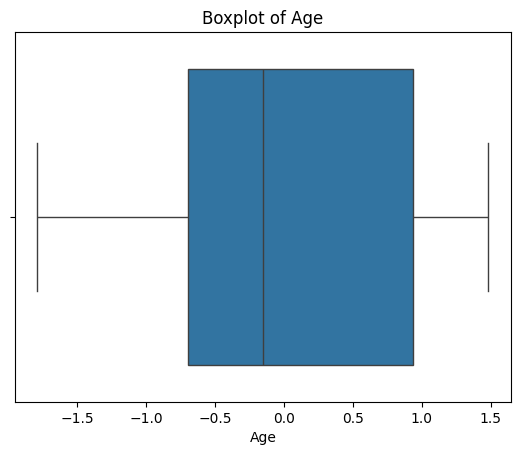

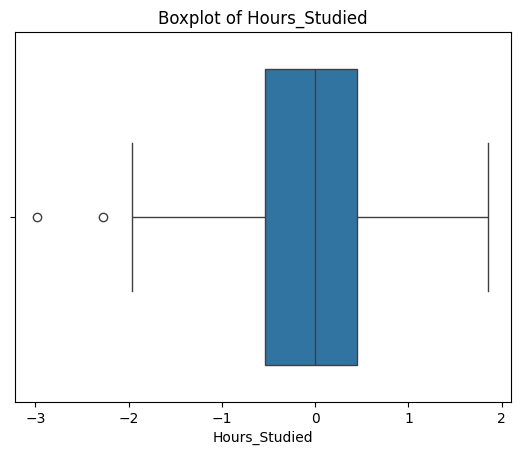

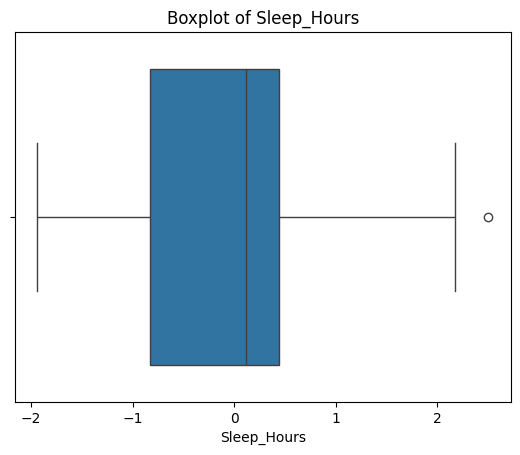

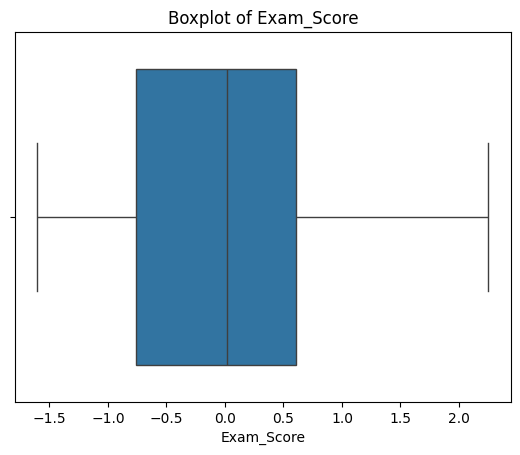

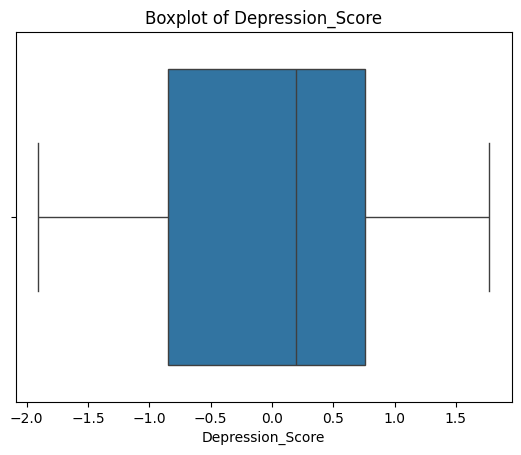

In [149]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [151]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


In [152]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 49
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           45 non-null     object 
 1   Age                  45 non-null     float64
 2   Hours_Studied        45 non-null     float64
 3   Sleep_Hours          45 non-null     float64
 4   Exam_Score           45 non-null     float64
 5   Part_of_Clubs        45 non-null     int64  
 6   Therapy_Seeking      45 non-null     int64  
 7   Depression_Score     45 non-null     float64
 8   Gender_Male          45 non-null     bool   
 9   Gender_Other         45 non-null     bool   
 10  Stress_Level_Low     45 non-null     bool   
 11  Stress_Level_Medium  45 non-null     bool   
dtypes: bool(4), float64(5), int64(2), object(1)
memory usage: 3.3+ KB
None
  Student_ID       Age  Hours_Studied  Sleep_Hours  Exam_Score  Part_of_Clubs  \
0       S001  1.483528       0.453036     0.1